# Stringart
This project aims to reconstruct a grayscale input image by using black strings spanned between pins on the outside of a light circular canvas.

In [1]:
import torch
torch.set_default_dtype(torch.float64)

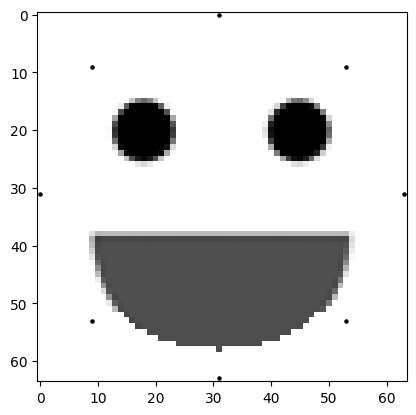

In [6]:
import matplotlib.pyplot as plt
from string_art.image import load_input_image, create_circular_mask
from string_art import pins

IMAGE_SIZE = 64
N_pins = 8

# visualize input image
img = load_input_image('data/inputs/smiley.png', IMAGE_SIZE) # [H, W]
circular_mask = create_circular_mask(IMAGE_SIZE, radius=IMAGE_SIZE//2-5)
img[~circular_mask] = 0.
plt.imshow(img.numpy(), cmap='gray')

# visualize pin positions
pin_positions = pins.point_based(N_pins, IMAGE_SIZE) # [N_pins, 2] first pin on the right then moving counter-clockwise
plt.scatter(pin_positions[:, 1].numpy(), pin_positions[:, 0].numpy(), c='black', s=5)

plt.show()

### String Matrix Computation

In [ ]:
from string_art.string_matrix import get_string_matrix, line_profile
from string_art import edges

STRING_WIDTH = 0.5
STRING_COLOR = 0.8

full_edges = edges.point_based(pin_positions) # [N_pins, 2]
A = get_string_matrix(full_edges, line_profile.trapez(STRING_WIDTH, STRING_COLOR), IMAGE_SIZE) # [HW, N_strings]
A[~circular_mask.flatten(), :] = 0.
_, axs = plt.subplots(1, 4)
string_img = torch.zeros(IMAGE_SIZE, IMAGE_SIZE)
for i, ax in enumerate(axs):
    ax.set_title(f'pin 0 to {i+1}')
    a = A[:, i].reshape(IMAGE_SIZE, IMAGE_SIZE) # [H, W]
    string_img += a
    ax.imshow(1-string_img, cmap='gray', vmin=0, vmax=1)
    ax.scatter(pin_positions[:, 1].numpy(), pin_positions[:, 0].numpy(), c='black', s=5)
plt.show()

### Optimization

In [1]:
from string_art.optimization import naive_greedy, StringPath
import string_art.edges as edges
from IPython.display import display, clear_output

fig, ax = plt.subplots()  # Create a figure and axis
ax.scatter(pin_positions[:, 1].numpy(), pin_positions[:, 0].numpy(), c='black', s=5)
string_img = torch.zeros(IMAGE_SIZE, IMAGE_SIZE)
img_plot = ax.imshow(1-string_img, cmap='gray', vmin=0, vmax=1) 

b = img.reshape(-1) # [HW]
path = StringPath(edges.index_based(N_pins), start_pin_index=0)
for step in range(300):
    path = naive_greedy(A, b, path)
    new_string = A[:, path.edge_path[-1]] # [HW]
    string_img += new_string.reshape(IMAGE_SIZE, IMAGE_SIZE)
    # update img plot
    ax.set_title(f'image reconstruction step={step}')  # Update the title
    img_plot.set_data(1-string_img)
    clear_output(wait=True)
    display(fig)

NameError: name 'plt' is not defined